In [1]:
import xarray as xr
import cartopy.crs as ccrs
import hvplot.pandas # necessary for hvplot to work with pandas dataframes

# Glømma dataset example

In this example data is queried, then a subset of the data is selected, then varibles in the dataset are plot against time. 

## Connect to the dataset

This just queries an overview of the dataset for Glømma

In [2]:
ds_gl = xr.open_dataset("https://thredds.niva.no/thredds/dodsC/datasets/loggers/glomma/baterod.nc")

## Subset the data

If you don't need the full dataset it is important to subset the dataset to avoid downloading all the data. Select July data from 2023

In [3]:
ds_gl_july2023 = ds_gl.sel(time="2023-07")
ds_gl_july2023

<xarray.Dataset> Size: 36kB
Dimensions:           (time: 744)
Coordinates:
    longitude         float64 8B ...
    latitude          float64 8B ...
  * time              (time) datetime64[ns] 6kB 2023-07-01 ... 2023-07-31T23:...
Data variables:
    station_name      |S64 64B ...
    temp_water_avg    (time) float64 6kB ...
    phvalue_avg       (time) float64 6kB ...
    condvalue_avg     (time) float64 6kB ...
    turbidity_avg     (time) float64 6kB ...
    cdomdigitalfinal  (time) float64 6kB ...
Attributes: (12/36)
    id:                                        no.niva:af047ff6-e92a-47a0-a9a...
    featureType:                               timeSeries
    title:                                     Sensor station at Baterød in G...
    summary:                                   Water quality sensor measureme...
    title_no:                                  Sensorstasjon ved Baterød i ne...
    summary_no:                                Vannkvalitets målinger fra sen...
    ...                                        ...
    publisher_url:                             https://niva.no
    license:                                   http://spdx.org/licenses/CC-BY...
    iso_topic_category:                        inlandWaters
    history:                                   Built with dscreator
    collection:                                ADC
    THREDDSMetadata_services_opendap_service:  https://thredds.niva.no/thredd...

## Plot temperature

In this dataset [3], the temperature data variable is called __temp_water_avg__.

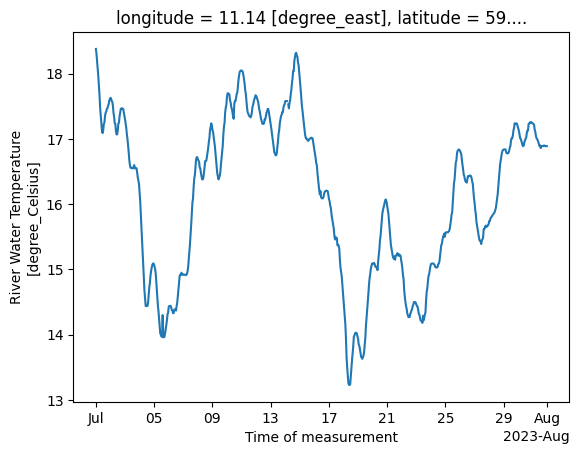

In [4]:
ds_gl_july2023.temp_water_avg.plot()

## Plot pH

In this dataset [3], the pH is data variable is called called __phvalue_avg__.

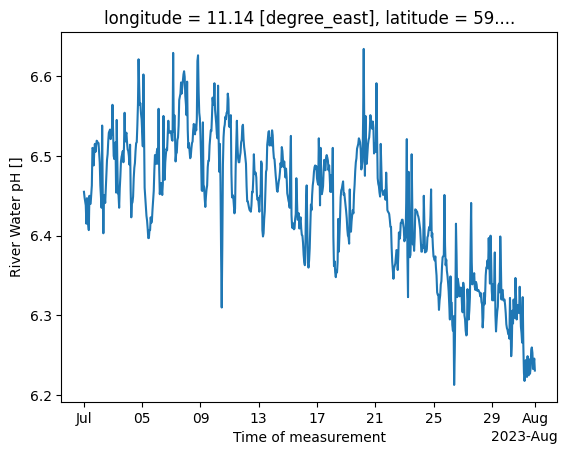

In [5]:
ds_gl_july2023.phvalue_avg.plot()

# Color Fantasy dataset example

In this example data is queried and and one of the variables is plot on a map.

## Connect to the dataset and subset the data

Query the dataset and select the time interval equivalent to a full round trip: 2022-06-01 to 2022-06-04.

In [6]:
ds_fa = xr.open_dataset(
    "https://thredds.niva.no/thredds/dodsC/datasets/norsoop/color_fantasy/merged_acdd_color_fantasy.nc"
)
ds = ds_fa.sel(time=slice("2022-06-01", "2022-06-04"))
ds

<xarray.Dataset> Size: 226kB
Dimensions:          (time: 4436)
Coordinates:
  * time             (time) datetime64[ns] 35kB 2022-06-01 ... 2022-06-04T23:...
    latitude         (time) float64 35kB ...
    longitude        (time) float64 35kB ...
Data variables:
    temperature      (time) float64 35kB ...
    salinity         (time) float64 35kB ...
    oxygen_sat       (time) float64 35kB ...
    temperature_qc   (time) int8 4kB ...
    salinity_qc      (time) int8 4kB ...
    oxygen_sat_qc    (time) int8 4kB ...
    trajectory_name  |S64 64B ...
Attributes: (12/45)
    title:                                        FerryBox on MS Color Fantasy
    summary:                                      The FerryBox system measure...
    title_no:                                     FerryBox på MS Color Fantasy
    summary_no:                                   Ferrybox-systemet måler som...
    date_created:                                 2024-06-18T11:41:25Z
    keywords:                                     GCMDSK:EARTH SCIENCE > OCEA...
    ...                                           ...
    creator_name:                                 Norwegian Institute for Wat...
    publisher_institution:                        Norwegian Institute for Wat...
    collection:                                   GEONOR, NMDC
    THREDDSMetadata_services_opendap_service:     https://thredds.niva.no/thr...
    THREDDSMetadata_services_httpserver_service:  https://thredds.niva.no/thr...
    DODS_EXTRA.Unlimited_Dimension:               time

## Plotting temperature on a map

Like in the previous example, we can plot the temperature on a graph directly from the array.

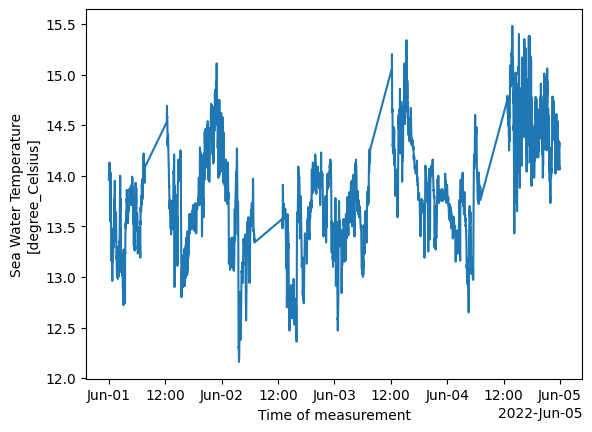

In [7]:
ds["temperature"].plot()

To plot on a graph, first transform the array to a pandas dataframe

In [8]:
df= ds.to_dataframe()
df

,latitude,longitude,temperature,salinity,oxygen_sat,temperature_qc,salinity_qc,oxygen_sat_qc,trajectory_name
time,,,,,,,,,
2022-06-01 00:00:00,57.582778,11.393990,13.96,26.916,104.24,1,1,1,b'color_fantasy'
2022-06-01 00:01:00,57.588303,11.390728,14.03,26.800,104.14,1,1,1,b'color_fantasy'
2022-06-01 00:02:00,57.593637,11.387573,14.03,26.814,104.09,1,1,1,b'color_fantasy'
2022-06-01 00:03:00,57.611657,11.376698,14.01,26.807,104.12,1,1,1,b'color_fantasy'
2022-06-01 00:04:00,57.604470,11.381135,14.00,26.815,104.26,1,1,1,b'color_fantasy'
...,...,...,...,...,...,...,...,...,...
2022-06-04 23:55:00,57.529023,11.482188,14.21,25.789,101.26,1,1,1,b'color_fantasy'
2022-06-04 23:56:00,57.520890,11.488532,14.11,25.958,101.40,1,1,1,b'color_fantasy'
2022-06-04 23:57:00,57.526287,11.484357,14.06,26.165,101.60,1,1,1,b'color_fantasy'


With hvplot and cartopy, plot the temperature on a map

In [9]:
df.hvplot.points(
    'longitude', 'latitude', color='temperature', alpha=0.2,
    coastline=True, projection=ccrs.Mercator(-90, 30), width=1200, height=400, xaxis=False, yaxis=False,
)

:Overlay
   .Points.I    :Points   [longitude,latitude]   (temperature)
   .Coastline.I :Feature   [Longitude,Latitude]